## The bin

We are going to take a very long detour that will give us a ton of intuition about machine learning, and this detour begins with a bin. This bin only has read and green balls inside of it, and the bin has infinite balls.

Okay a pretty far fetched bin (and you might be seeing the comparision that we will make later).

Now what you want to know is the probability of picking a green marble from the bin. (Intuitively this probability would be the number of green marbles in the bin divided by the number of red marbles). But the only way that you get to know what this probability is, is by sampling from the bin: by taking just a handful of balls out of the bin.

Let's be specific below:

In [10]:
import numpy as np

def rg_bin():
    # trying to make this somewhat secret for suspense
    secret_probability = 1 / float(0b0100) 

    if secret_probability < np.random.rand():
        return 'r'
    else:
        return 'g'

In [11]:
sample = [rg_bin() for _ in range(10)]

sample

['g', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'g']

Some things to note here. Is rg_bin a r.v.? Not quite, it does not return a number. Are the samples iid? Yes. They are certainly independently distributed. And in this case they are independent as well.

Now look at the above sample and tell be what you know about the secret_probability.

Well not much for certain. You probably know that it is neither 0 nor 1. You might suspect that is is not so high, but do you know it for sure? No.

We are again in this situation that the next sample might be completely different than this one. But what is the big difference that we have not accounted for yet? 

These samples aren't from Baal! They are just from a probability distribution! 

And what can we do with iid samples from a probability distribution?

Soooo much :)

## Bin bootstrapping

We are interested in knowing the probability of drawing a green ball from the bin, and all we have is a sample from the bin. So what do we do?

Bootstrap!

In this case our estimator of interest is: the probability of drawing green from the bin. Below is the code to get our bootstrap distribution:

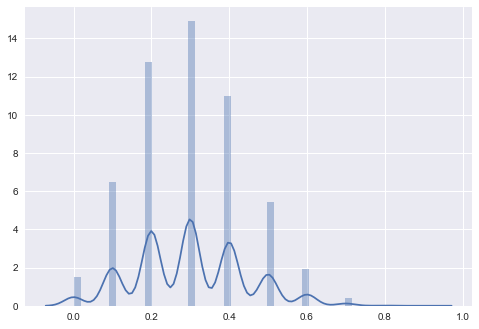

In [17]:
%matplotlib inline
import seaborn as sns

def green_prob(sample):
    bootstrap_sample = np.random.choice(sample, 10, True)
    return (np.array(bootstrap_sample) == 'g').mean()

bootstrap_green_prob = [green_prob(sample) for _ in range(10000)]

sns.distplot(bootstrap_green_prob)

Now can you tell me anything about the probability of green in the population distribution?

As always, the bigger the sample the better, and the more bootstrap estimates the better, but because we have iid samples from a r.v. we can say something about this magic bin. 

Above we can say that we are pretty confident that the probability of drawing a green from the population distribution is around .25

## Connection to learning

Well remember how we ended last class? We ended with the question: is it possible to learn? Well suprise the bin example has been moving toward that goal all along.

Assume that each ball in the bin is a data point. There are infinitely many! 

Now assume that we have a hypothesis, g, that we want to test. Well even though we don't have the bin of data points, you can imagine testing the efficacy of your hypothesis on each of the data points. For each data point we ask if your hypothesis was right, and if it was right, then we color the data point/ball green. 

Then we can ask the question: how well does our hypothesis do on all the data? 

Before we had to say: no idea!

But now because of what we have already learned, we can say: well based on the bootstrap estimate of the performance we are 95% confident that it is between this and that bound.

So in summary, the bin is the population distribution, the balls are data points, the color of the balls is whether our hypothesis got them wrong or not, the sample of balls are our testing/training data, and the probability the ball is green, will be the probability that our hypothesis will be right on any given iid sample from the bin.

## Why does this matter

The big thing here is that we have shown that we can learn (somewhat). We have shown that we can at least test to make sure that our final hypothesis works. 

But the next class we go over a cautionary tale, which is the one of learning. We show how you can test multiple hypotheses and still end up with a useful hypothesis in the end. But we learn the danger in doing so. 

## A note on other appoaches

The typical approach used to make this point is a probabilistic one and requires more mathematical intuition about r.v. and probability distributions. And it uses something called the Hoeffding's Inequality. We will not be going over this in class, that being said, for those more mathematically and statistically inclined it might be fun to check it out and see how it applies to the above situation.